In [25]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
new_df = pd.read_csv('/content/updated_dataset.csv',encoding = 'latin')
new_df

,title,rating,body,y,cleaned_reviews
0,One of my favorite Amazon purchases ever!,5,these are so much fun we ordered the small siz...,2,much fun order small size fit standard hardbac...
1,As expected but doesn??t fit standard hardcover,4,let me start by saying i??ve got a master??s...,2,let start say got master degre english clearli...
2,Happy mom day to me,5,these are awesome i should??ve bought the sma...,2,awesom bought small mani larg book use conceal...
3,Perfect for Sonos One,5,i wanted to mount a sonos speaker in my bathro...,2,want mount sono speaker bathroom drill marbl t...
4,Very sturdy even after multiple moves and 5 ye...,5,i love these floating bookshelves they give a ...,2,love float bookshelv give magic feel room boug...
...,...,...,...,...,...
194,The shelf part that is supposed to fit inside ...,2,the shelf part that is supposed to fit inside ...,0,shelf part suppos fit insid back cover hardbac...
195,Love it,5,looks great also very sturdy it comes with anc...,2,look great also sturdi come anchor definit hou...
196,Easy to install and fun look for nursery,5,since i have a bajillion books for my baby i t...,2,sinc bajillion book babi thought would make fu...
197,Nice price,5,good product for price,2,good product price


In [3]:
# Changes the overall category to Good, Worst and Moderate reviews through ratings
new_df["classes_review"] = new_df["rating"]
new_df["classes_review"].replace({5.0: "good",4.0:"good",3.0:"moderate",2.0:"bad",1.0:"bad"}, inplace=True)
new_df

,title,rating,body,y,cleaned_reviews,classes_review
0,One of my favorite Amazon purchases ever!,5,these are so much fun we ordered the small siz...,2,much fun order small size fit standard hardbac...,good
1,As expected but doesn??t fit standard hardcover,4,let me start by saying i??ve got a master??s...,2,let start say got master degre english clearli...,good
2,Happy mom day to me,5,these are awesome i should??ve bought the sma...,2,awesom bought small mani larg book use conceal...,good
3,Perfect for Sonos One,5,i wanted to mount a sonos speaker in my bathro...,2,want mount sono speaker bathroom drill marbl t...,good
4,Very sturdy even after multiple moves and 5 ye...,5,i love these floating bookshelves they give a ...,2,love float bookshelv give magic feel room boug...,good
...,...,...,...,...,...,...
194,The shelf part that is supposed to fit inside ...,2,the shelf part that is supposed to fit inside ...,0,shelf part suppos fit insid back cover hardbac...,bad
195,Love it,5,looks great also very sturdy it comes with anc...,2,look great also sturdi come anchor definit hou...,good
196,Easy to install and fun look for nursery,5,since i have a bajillion books for my baby i t...,2,sinc bajillion book babi thought would make fu...,good
197,Nice price,5,good product for price,2,good product price,good


In [5]:
new_df["classes_review"].unique()

array(['good', 'bad', 'moderate'], dtype=object)

In [6]:
new_df['classes_review'].value_counts()

good        175
bad          15
moderate      9
Name: classes_review, dtype: int64

In [9]:
import spacy
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")
import re

In [10]:
def normalize(msg):
    msg = re.sub('[^A-Za-z]+', ' ', msg) #remove special character and intergers
    doc = nlp(msg)
    res=[]
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_currency or token.is_space or len(token.text) <= 2): #word filteration
            pass
        else:
            res.append(token.lemma_.lower())
    return res

new_df["cleaned_reviews_1"] = new_df["cleaned_reviews"].apply(normalize)
new_df.head()

,title,rating,body,y,cleaned_reviews,classes_review,cleaned_reviews_1
0,One of my favorite Amazon purchases ever!,5,these are so much fun we ordered the small siz...,2,much fun order small size fit standard hardbac...,good,"[fun, order, small, size, fit, standard, hardb..."
1,As expected but doesn??t fit standard hardcover,4,let me start by saying i??ve got a master??s...,2,let start say got master degre english clearli...,good,"[let, start, get, master, degre, english, clea..."
2,Happy mom day to me,5,these are awesome i should??ve bought the sma...,2,awesom bought small mani larg book use conceal...,good,"[awesom, buy, small, mani, larg, book, use, co..."
3,Perfect for Sonos One,5,i wanted to mount a sonos speaker in my bathro...,2,want mount sono speaker bathroom drill marbl t...,good,"[want, mount, sono, speaker, bathroom, drill, ..."
4,Very sturdy even after multiple moves and 5 ye...,5,i love these floating bookshelves they give a ...,2,love float bookshelv give magic feel room boug...,good,"[love, float, bookshelv, magic, feel, room, bu..."


In [14]:
# words count
from collections import Counter
words_count = Counter([words for subtext in new_df['cleaned_reviews_1'] for words in subtext])
common_words = pd.DataFrame(words_count.most_common(100))
common_words.columns = ['common_words','count']
common_words

,common_words,count
0,book,478
1,shelf,153
2,use,148
3,small,124
4,look,114
...,...,...
95,theyr,12
96,home,12
97,year,12
98,issu,12


In [18]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

In [29]:
words= most_common['most_common_word']
words_= ' '.join(words)

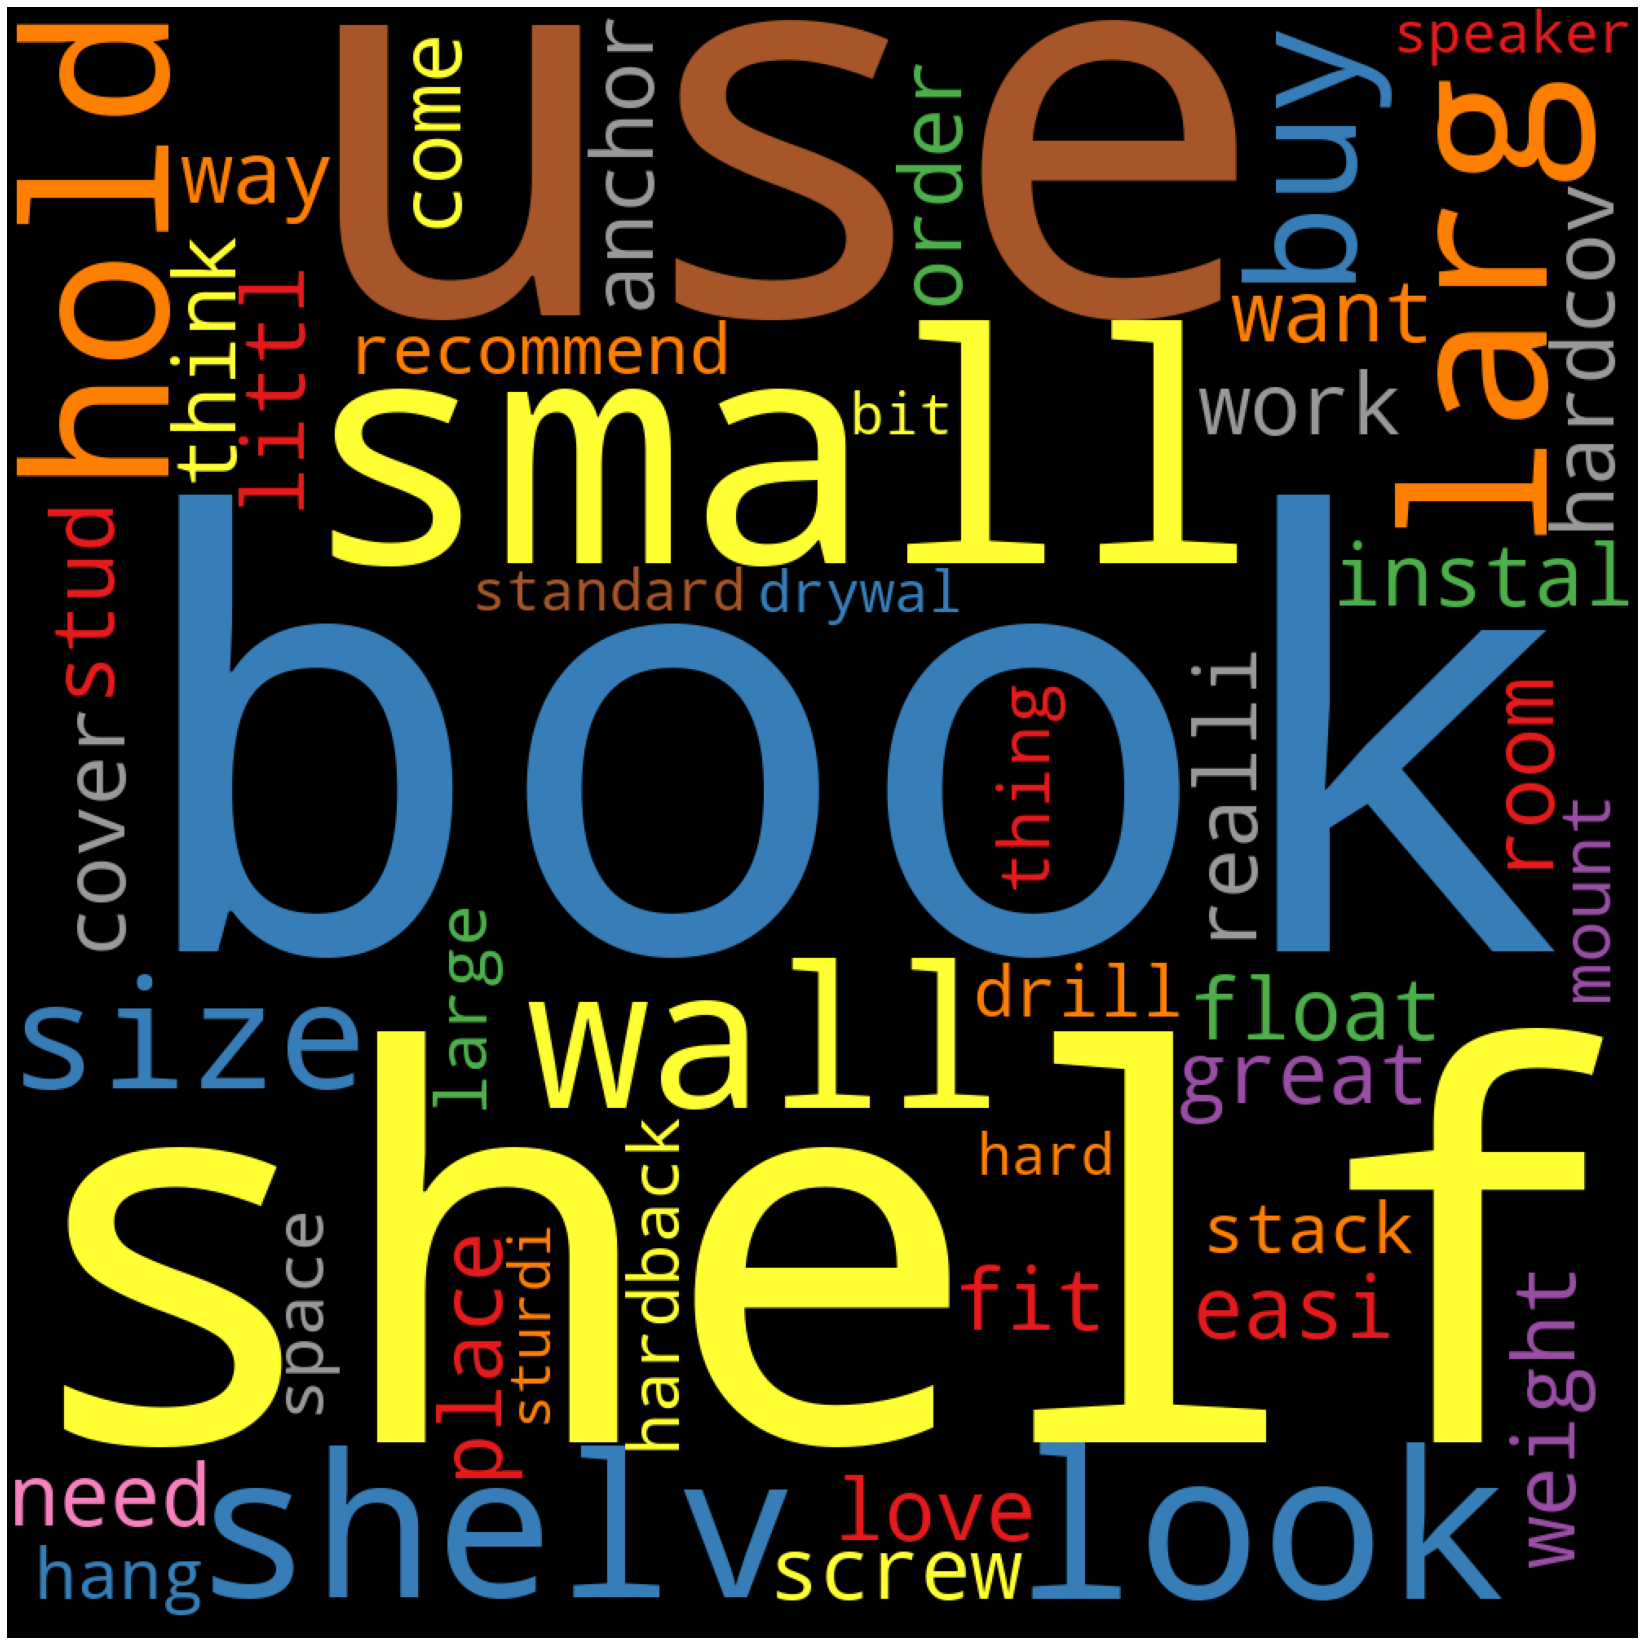

In [33]:
wordcloud=WordCloud(width=1000,height=1000,background_color='black',max_words=50,
                   colormap='Set1').generate(words_)
plot_cloud(wordcloud)

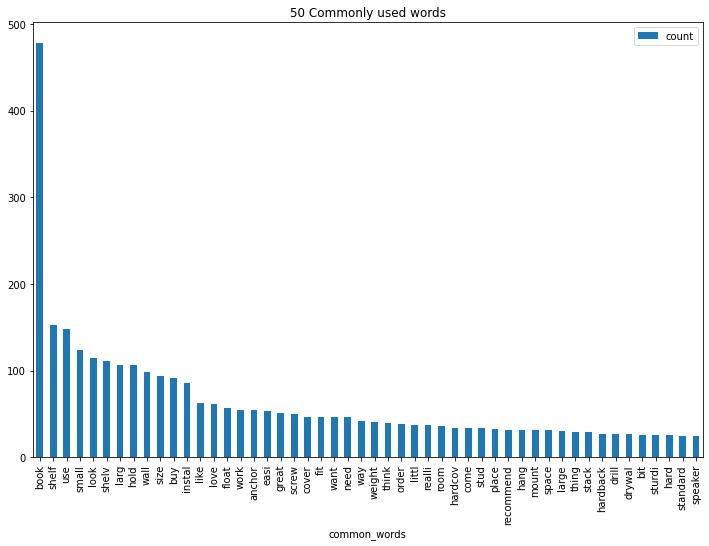

In [37]:
#Visualizing results 
common_words[0:50].plot.bar(x='common_words',figsize=(12,8),title='50 Commonly used words');

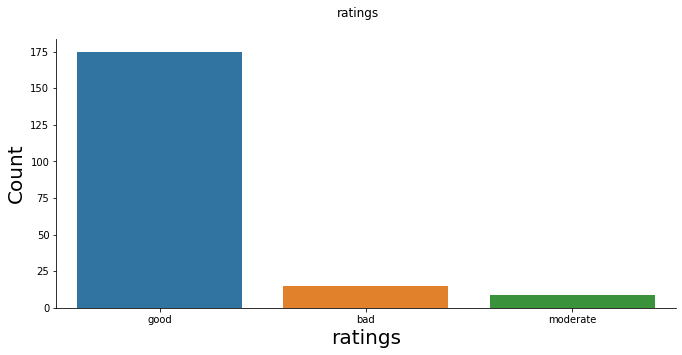

In [41]:
#hist for ratings
import seaborn as sns
fig, axes = plt.subplots(1, figsize=(10,5))
fig.suptitle("ratings")
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes_review", data = new_df)
axes.set_xlabel("ratings", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [50]:
def percentage_ratings(data, category):
    return (len(data[data["classes_review"] == category])/len(data)) * 100
   


In [57]:

print(f"Percentage of Good words  {percentage_ratings(new_df, 'good')} %")
print(f"Percentage of moderate words  {percentage_ratings(new_df, 'moderate')} %")
print(f"Percentage of bad words  {percentage_ratings(new_df, 'bad')} %")

Percentage of Good words  87.93969849246231 %
Percentage of moderate words  4.522613065326634 %
Percentage of bad words  7.537688442211055 %
